In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.seterr(over='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'ignore', 'under': 'ignore'}

In [24]:
def load_dataset(file_name):
    data = np.loadtxt(file_name)
    features = data[:,:2]
    labels = data[:,-1]
    return features, labels

In [25]:
train_A_x, train_A_y = load_dataset('hwk2data/hwk2data/classificationA.train')
train_B_x, train_B_y = load_dataset('hwk2data/hwk2data/classificationB.train')
train_C_x, train_C_y = load_dataset('hwk2data/hwk2data/classificationC.train')

test_A_x, test_A_y = load_dataset('hwk2data/hwk2data/classificationA.test')
test_B_x, test_B_y = load_dataset('hwk2data/hwk2data/classificationB.test')
test_C_x, test_C_y = load_dataset('hwk2data/hwk2data/classificationC.test')

In [35]:
def calculate_MLE_params(features,labels):
    pi_1 = np.sum(labels)/labels.shape[0]
    pi_0 = (1 - pi_1)
    
    labels_inv = np.ones_like(labels) - labels
    
    mu_1 = np.sum(np.multiply(labels, features),axis=0)/np.sum(labels)
    mu_0 = np.sum(np.multiply(labels_inv, features),axis=0)/np.sum(labels_inv)
    
    mu_0 = np.reshape(mu_0,(-1,2))
    mu_1 = np.reshape(mu_1,(-1,2))
    
    sigma = np.zeros((features.shape[1],features.shape[1]))
    
    for i in range(labels.shape[0]):
        sigma = sigma + labels[i,0]*np.outer((features[i,:] - mu_1),\
        np.transpose((features[i,:] - mu_1)))\
        + (1 - labels[i,0])*np.outer((features[i,:] - \
        mu_0),np.transpose((features[i,:] - mu_0)))
    sigma = sigma/labels.shape[0]
    
    sigma_inv = np.linalg.inv(sigma)
    beta = np.matmul(sigma_inv,np.transpose((mu_1 - mu_0)))
    gamma = -0.5*(np.matmul(np.matmul((mu_1 - mu_0),sigma_inv),\
    np.transpose(mu_1 + mu_0))) + np.log(pi_1/pi_0)
    return mu_1, mu_0, sigma, beta, gamma, pi_1
    

In [36]:
def plot_data(train_x, train_y, beta, gamma, title):
    
    y_1_idx = np.where(train_y == 1)
    y_0_idx = np.where(train_y == 0)
    feat_1 = train_x[y_1_idx]
    feat_0 = train_x[y_0_idx]
    plt.plot(feat_1[:,0],feat_1[:,1],'+',label='y=1')
    plt.plot(feat_0[:,0],feat_0[:,1],'x',label='y=0')
    plt.plot(train_x[:,0],-1*(beta[0,0]*train_x[:,0] 
    + gamma[0,0])/beta[1,0],label='P(y=1|x)=0.5')
    plt.legend()
    plt.title(title)
    plt.show()
    

In [37]:
def calculate_err(test_x, test_y, beta, gamma):
    test_y = np.reshape(test_y,(-1,1))
    out_labels = np.zeros_like(test_y)
    sigm_arg = np.reshape(beta[0,0]*test_x[:,0] \
    + beta[1,0]*test_x[:,1],(-1,1))\
    + gamma[0,0]*np.ones((test_x.shape[0],1))
    
    out_labels[sigm_arg >= 0.0] = 1.0
    out_labels[sigm_arg < 0] = 0.0
    
    err = np.sum(np.abs(test_y - out_labels))/test_y.shape[0]
    return err

pi_1 = 0.333333
mu_0 = 
[[ 2.89970947 -0.893874  ]]
mu_1 = 
[[-2.69232004  0.866042  ]]
sigma = 
[[ 2.44190897 -1.13194024]
 [-1.13194024  0.61375465]]
beta = 
[[-6.62245258]
 [-9.3462503 ]]
gamma = 
[[-0.13649629]]


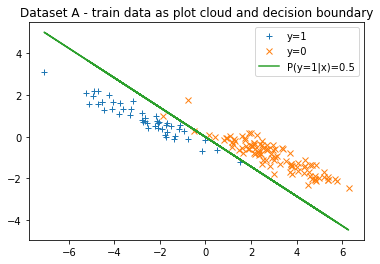

Misclassification error for train dataset A = 1.33 %
Misclassification error for test dataset A = 2.00 %


In [38]:
mu_1, mu_0, sigma, beta, gamma, pi_1 = calculate_MLE_params(train_A_x, np.reshape(train_A_y,(-1,1)))
print 'pi_1 = %f' % pi_1
print 'mu_0 = '
print mu_0
print 'mu_1 = '
print mu_1
print 'sigma = '
print sigma
print 'beta = '
print beta
print 'gamma = '
print gamma
plot_data(train_A_x, train_A_y, beta, gamma, 'Dataset A - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset A = %.2f %%' \
% (100*calculate_err(train_A_x, train_A_y, beta, gamma))
print 'Misclassification error for test dataset A = %.2f %%' \
% (100*calculate_err(test_A_x, test_A_y, beta, gamma))

pi_1 = 0.500000
mu_0 = 
[[ 3.34068896 -0.83546333]]
mu_1 = 
[[-3.21670734  1.08306733]]
sigma = 
[[ 3.34623467 -0.13516489]
 [-0.13516489  1.73807475]]
beta = 
[[-1.92108197]
 [ 0.95442836]]
gamma = 
[[ 0.00092929]]


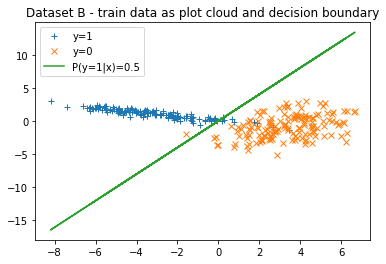

Misclassification error for train dataset B = 3.00 %
Misclassification error for test dataset B = 4.15 %


In [39]:
mu_1, mu_0, sigma, beta, gamma, pi_1 = calculate_MLE_params(train_B_x, np.reshape(train_B_y,(-1,1)))
print 'pi_1 = %f' % pi_1
print 'mu_0 = '
print mu_0
print 'mu_1 = '
print mu_1
print 'sigma = '
print sigma
print 'beta = '
print beta
print 'gamma = '
print gamma
plot_data(train_B_x, train_B_y, beta, gamma,'Dataset B - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset B = %.2f %%' % (100*calculate_err(train_B_x, train_B_y, beta, gamma))
print 'Misclassification error for test dataset B = %.2f %%' % (100*calculate_err(test_B_x, test_B_y, beta, gamma))

pi_1 = 0.625000
mu_0 = 
[[ 2.79304824 -0.83838667]]
mu_1 = 
[[-2.94232885 -0.9578284 ]]
sigma = 
[[ 2.88039225 -0.63405081]
 [-0.63405081  5.19952435]]
beta = 
[[-2.05129911]
 [-0.27311529]]
gamma = 
[[ 0.11242913]]


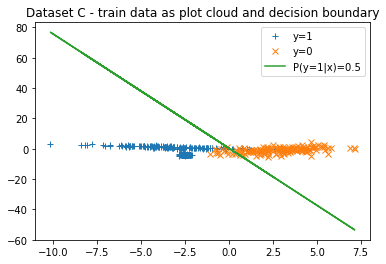

Misclassification error for train dataset C = 5.50 %
Misclassification error for test dataset C = 4.23 %


In [40]:
mu_1, mu_0, sigma, beta, gamma, pi_1 = calculate_MLE_params(train_C_x, np.reshape(train_C_y,(-1,1)))
print 'pi_1 = %f' % pi_1
print 'mu_0 = '
print mu_0
print 'mu_1 = '
print mu_1
print 'sigma = '
print sigma
print 'beta = '
print beta
print 'gamma = '
print gamma
plot_data(train_C_x, train_C_y, beta, gamma,'Dataset C - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset C = %.2f %%' % (100*calculate_err(train_C_x, train_C_y, beta, gamma))
print 'Misclassification error for test dataset C = %.2f %%' % (100*calculate_err(test_C_x, test_C_y, beta, gamma))